# Likes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

In [16]:
src = '../../data/tweets'
dst = '../../plots/likes/'
colors = ['#1c9099', 'grey', '#ffc996', '#ff8474', '#9f5f80', '#583d72' ]


In [5]:
ESC_tweets = pd.read_csv(join(src, 'ESC.csv'), low_memory=False,
                        parse_dates=['created_at'])
ESC_tweets['created_at_date'] = ESC_tweets['created_at'].dt.date
ESC_tweets = ESC_tweets[\
        ESC_tweets['created_at_date'] >= pd.to_datetime('2021-01-01')]
ESC_tweets = ESC_tweets.sort_values(by=['created_at'])
ESC_tweets = ESC_tweets.reset_index(drop=True)

In [6]:
N = len(ESC_tweets)
ESC_tweets = ESC_tweets.drop_duplicates(subset=['id'])
print('dropped {} out of {} tweets, because they were duplicates'\
         .format(N - len(ESC_tweets), N))

dropped 0 out of 39852 tweets, because they were duplicates


In [7]:
BTW_tweets = pd.read_csv(join(src, 'bundestagswahl.csv'), low_memory=False,
                        parse_dates=['created_at'])
BTW_tweets['created_at_date'] = BTW_tweets['created_at'].dt.date
BTW_tweets = BTW_tweets[\
        BTW_tweets['created_at_date'] >= pd.to_datetime('2021-01-01')]
BTW_tweets = BTW_tweets.sort_values(by=['created_at'])
BTW_tweets = BTW_tweets.reset_index(drop=True)

In [8]:
N = len(BTW_tweets)
BTW_tweets = BTW_tweets.drop_duplicates(subset=['id'])
print('dropped {} out of {} tweets, because they were duplicates'\
         .format(N - len(BTW_tweets), N))

dropped 0 out of 230664 tweets, because they were duplicates


In [9]:
IchBinHanna_tweets = pd.read_csv(join(src, 'IchBinHanna.csv'), low_memory=False,
                        parse_dates=['created_at'])
IchBinHanna_tweets['created_at_date'] = IchBinHanna_tweets['created_at'].dt.date
IchBinHanna_tweets = IchBinHanna_tweets[\
        IchBinHanna_tweets['created_at_date'] >= pd.to_datetime('2021-01-01')]

In [10]:
HannaImBundestag_tweets = pd.read_csv(join(src, 'HannaImBundestag.csv'), low_memory=False,
                        parse_dates=['created_at'])
HannaImBundestag_tweets['created_at_date'] = HannaImBundestag_tweets['created_at'].dt.date
HannaImBundestag_tweets = HannaImBundestag_tweets[\
        HannaImBundestag_tweets['created_at_date'] >= pd.to_datetime('2021-01-01')]

In [11]:
hanna_tweets = pd.concat([IchBinHanna_tweets, HannaImBundestag_tweets])
hanna_tweets = hanna_tweets.sort_values(by=['created_at'])
hanna_tweets = hanna_tweets.reset_index(drop=True)

In [12]:
ESC_likes = ESC_tweets[['created_at_date', 'public_metrics.like_count']]\
    .groupby('created_at_date')\
    .agg('sum')\
    .reset_index()\
    .sort_values(by=['created_at_date'])\
    .reset_index(drop=True)\
    .rename(columns={'public_metrics.like_count':'likes'})
ESC_likes.head(3)

,created_at_date,likes
0,2021-01-01,8.0
1,2021-01-02,37.0
2,2021-01-03,1.0


In [13]:
hanna_likes = hanna_tweets[['created_at_date', 'public_metrics.like_count']]\
    .groupby('created_at_date')\
    .agg('sum')\
    .reset_index()\
    .sort_values(by=['created_at_date'])\
    .reset_index(drop=True)\
    .rename(columns={'public_metrics.like_count':'likes'})
hanna_likes.head(3)

,created_at_date,likes
0,2021-01-09,94.0
1,2021-01-11,1.0
2,2021-01-13,420.0


In [14]:
BTW_likes = BTW_tweets[['created_at_date', 'public_metrics.like_count']]\
    .groupby('created_at_date')\
    .agg('sum')\
    .reset_index()\
    .sort_values(by=['created_at_date'])\
    .reset_index(drop=True)\
    .rename(columns={'public_metrics.like_count':'likes'})
BTW_likes.head(3)

,created_at_date,likes
0,2021-01-01,49790.0
1,2021-01-02,85542.0
2,2021-01-03,71573.0


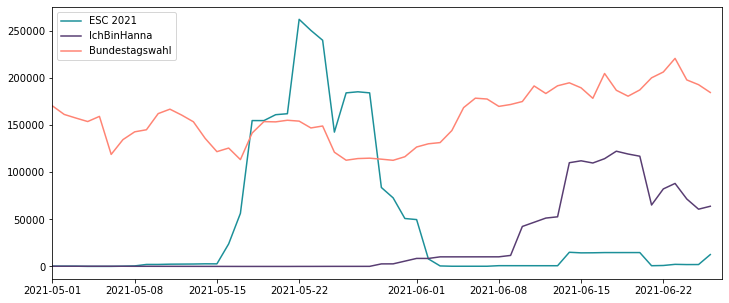

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))

ESC_likes['likes_avg'] = ESC_likes['likes'].rolling(7).mean()
hanna_likes['likes_avg'] = hanna_likes['likes'].rolling(7).mean()
BTW_likes['likes_avg'] = BTW_likes['likes'].rolling(7).mean()

ax.plot(ESC_likes['created_at_date'], ESC_likes['likes_avg'],
        label='ESC 2021', color=colors[0])
ax.plot(hanna_likes['created_at_date'], hanna_likes['likes_avg'],
        label='IchBinHanna', color=colors[-1])
ax.plot(BTW_likes['created_at_date'], BTW_likes['likes_avg'],
        label='Bundestagswahl', color=colors[-3])

ax.legend()

ax.set_xlim(pd.to_datetime('2021-05-01'), pd.to_datetime('2021-06-27'))

plt.savefig(join(dst, 'tweet_popularity_compared_to_other_events.pdf'))
plt.savefig(join(dst, 'tweet_popularity_compared_to_other_events.png'), dpi=300)